# Heatmap visualization: escaping from the usual heatmaps

I listening here some code for better visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#red is the red wine dataset, white is the white wine dataset
#the dataset are hosted in this GitHub repository
red = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
white = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
red = pd.read_csv(red, sep = ";")
white = pd.read_csv(white, sep = ";")

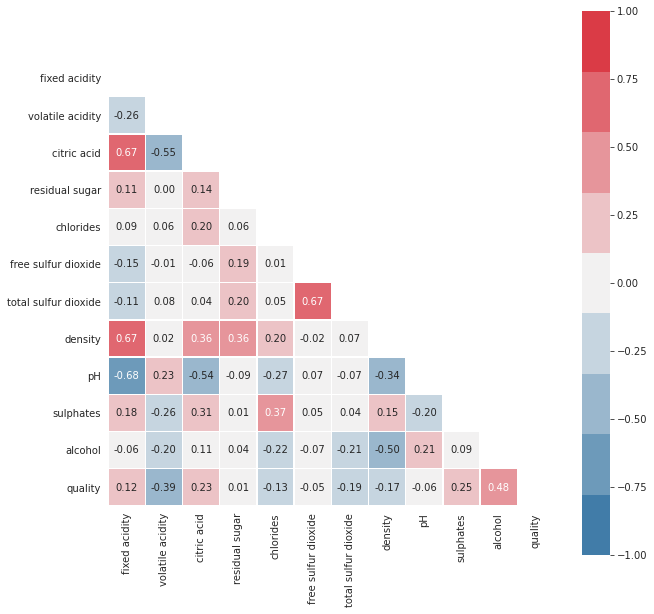

In [3]:
#a heatmap is showing clearing correlation (red) and anticorrelation (blue)
corr = white.corr() #calulating the correlation
mask = np.zeros_like(corr) #to mask the other corner, which is redundant
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, 
                     cmap=sns.diverging_palette(240, 10, n=9), #diverging palette to show corr and anticorr in different colors
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True)

<AxesSubplot:>

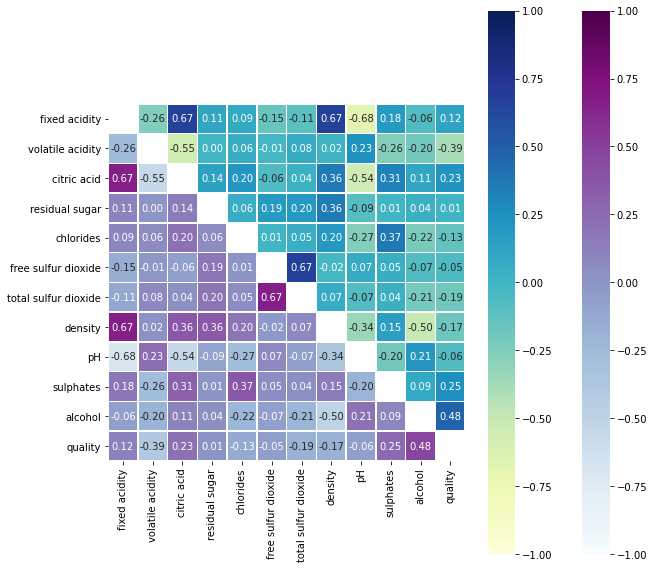

In [4]:

matrix_0 = np.triu(red.corr())
matrix_1 = np.tril(white.corr())

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(red.corr(),annot=True,mask=matrix_0,cmap="BuPu", linewidths=.5, square=True, vmin = -1, vmax = 1, fmt=".2f" )
sns.heatmap(white.corr(),annot=True,mask=matrix_1,cmap="YlGnBu", linewidths=.5, square=True, vmin = -1, vmax = 1, fmt=".2f")

In [5]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [7]:
cor_p = calculate_pvalues(white)
cor_p

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0,0,0,0,0.0002,0,0,0,0,0,0.0136,0
volatile acidity,0,0,0,0.9389,0.0142,0.6747,0.0022,0.3788,0,0,0,0
citric acid,0,0,0,0,0,0.0147,0.1555,0,0,0,0,0
residual sugar,0,0.9389,0,0,0.0262,0,0,0,0.0006,0.8252,0.0926,0.5832
chlorides,0.0002,0.0142,0,0.0262,0,0.8241,0.0581,0,0,0,0,0
free sulfur dioxide,0,0.6747,0.0147,0,0.8241,0,0,0.3805,0.0049,0.0389,0.0055,0.0428
total sulfur dioxide,0,0.0022,0.1555,0,0.0581,0,0,0.0044,0.0078,0.086,0,0
density,0,0.3788,0,0,0,0.3805,0.0044,0,0,0,0,0
pH,0,0,0,0.0006,0,0.0049,0.0078,0,0,0,0,0.021
sulphates,0,0,0,0.8252,0,0.0389,0.086,0,0,0,0.0002,0


<AxesSubplot:>

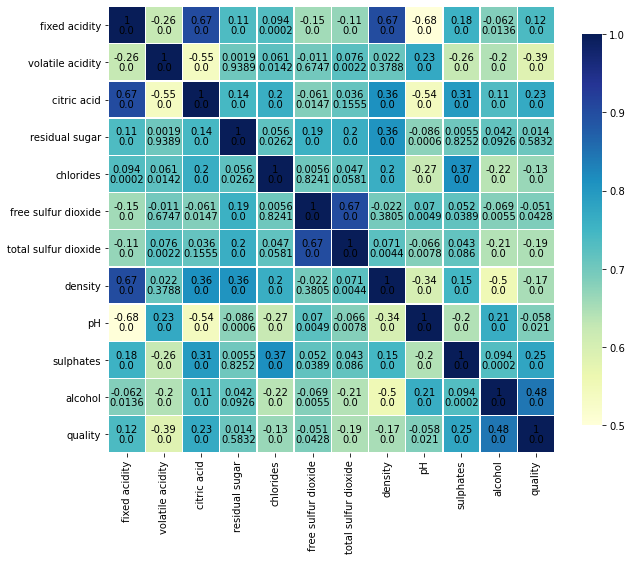

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, square = True, linewidths=.5, annot = True, 
             annot_kws={'va':'bottom', 'color':'black'}, cbar_kws={"shrink": .72},  #rank
            vmin = 0.5, vmax = 1, cmap ="YlGnBu")
sns.heatmap(corr, square = True, linewidths=.5, annot=cor_p,  #evaluation metric
             annot_kws={'va':'top', 'color':'black'}, 
             fmt="", cbar=False, cmap ="YlGnBu")